In [ ]:
pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased-sentence")
model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased-sentence")

In [ ]:
import torch
import gc
import multiprocessing as mp
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_1 = pd.read_csv('/content/drive/MyDrive/gr_1.csv')
df_1

In [ ]:
len(df_1)

In [ ]:
sentences1 = df_1['value/3/#text'].tolist()
sentences2 = df_1['value/4/#text'].tolist()

In [ ]:
cos = torch.nn.CosineSimilarity(dim=1)

In [ ]:
%%time
DF_FILE = '/content/drive/MyDrive/gr_1.csv'
# размер одного обрабатываемого кусочка датафрейма
CHUNKSIZE = 20

def process_frame(df_1):
  # функция принимает на вход датафрейм и возвращает косинусные подобия для каждого ряда
  similarities_1 = []
  for n, row in tqdm(df_1.iterrows()):
    s = row['value/3/#text']
    t = row['value/4/#text']
    tokens_s = tokenizer([s], return_tensors="pt", padding=True)
    tokens_t = tokenizer([t], return_tensors="pt", padding=True)
    out_s = model(**tokens_s)
    out_t = model(**tokens_t)
    vec_s = torch.mean(out_s.last_hidden_state, dim=1)
    vec_t = torch.mean(out_t.last_hidden_state, dim=1)
    cos_sim = cos(vec_s, vec_t)
    # item() превращает тензор во float
    similarities_1.append(cos_sim.item())
    # на всякий случай собираем ненужное при помощи garbage collector
    gc.collect()
  return similarities_1

# читаем файл по кусочкам заданного размера
reader = pd.read_csv(DF_FILE, chunksize=CHUNKSIZE)
# количество процессов, которые могут идти одновременно
pool = mp.Pool(4)

funclist_1 = []
for df_1_new in reader:
  # открываем и обрабатываем каждый кусочек
  df_1.columns = ['Unnamed:', 'value/0/#text', 'value/0/@_name', 'value/1/#text', 'value/1/@_name', 'value/2/#text', 'value/2/@_name', 'value/3/#text', 'value/3/@_name', 'value/4/#text', 'value/4/@_name', 'value/5/#text', 'value/5/@_name']
  f = pool.apply_async(process_frame, [df_1_new])
  funclist_1.append(f)

result_1 = []
for f in funclist_1:
  # таймаут можно увеличить, если возникает ошибка
  sims = f.get(timeout=500)
  result_1.extend(sims)

In [ ]:
len(result_1)

374

In [ ]:
result_1[:374]

In [ ]:
import numpy as np
np.mean(np.array(result_1))

0.9439571479106332

In [ ]:
np.std(np.array(result_1))

0.0501561482992784

In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/gr_0.csv')
df_2

In [ ]:
len(df_2)

778

In [ ]:
sentences3 = df_2['value/3/#text'].tolist()
sentences4 = df_2['value/4/#text'].tolist()

In [ ]:
cos = torch.nn.CosineSimilarity(dim=1)

In [ ]:
%%time
DF_FILE = '/content/drive/MyDrive/gr_0.csv'
# размер одного обрабатываемого кусочка датафрейма
CHUNKSIZE = 20

def process_frame(df_2):
  # функция принимает на вход датафрейм и возвращает косинусные подобия для каждого ряда
  similarities_2 = []
  for n, row in tqdm(df_2.iterrows()):
    s = row['value/3/#text']
    t = row['value/4/#text']
    tokens_s = tokenizer([s], return_tensors="pt", padding=True)
    tokens_t = tokenizer([t], return_tensors="pt", padding=True)
    out_s = model(**tokens_s)
    out_t = model(**tokens_t)
    vec_s = torch.mean(out_s.last_hidden_state, dim=1)
    vec_t = torch.mean(out_t.last_hidden_state, dim=1)
    cos_sim = cos(vec_s, vec_t)
    # item() превращает тензор во float
    similarities_2.append(cos_sim.item())
    # на всякий случай собираем ненужное при помощи garbage collector
    gc.collect()
  return similarities_2

# читаем файл по кусочкам заданного размера
reader = pd.read_csv(DF_FILE, chunksize=CHUNKSIZE)
# количество процессов, которые могут идти одновременно
pool = mp.Pool(4)

funclist_2 = []
for df_2_new in reader:
  # открываем и обрабатываем каждый кусочек
  df_2.columns = ['Unnamed:', 'value/0/#text', 'value/0/@_name', 'value/1/#text', 'value/1/@_name', 'value/2/#text', 'value/2/@_name', 'value/3/#text', 'value/3/@_name', 'value/4/#text', 'value/4/@_name', 'value/5/#text', 'value/5/@_name']
  f = pool.apply_async(process_frame, [df_2_new])
  funclist_2.append(f)

result_2 = []
for f in funclist_2:
  # таймаут можно увеличить, если возникает ошибка
  sims = f.get(timeout=500)
  result_2.extend(sims)

In [ ]:
len(result_2)

778

In [ ]:
result_2[:778]

In [ ]:
np.mean(np.array(result_2))

0.8931577214468415

In [ ]:
np.std(np.array(result_2))

0.07310552116902

In [ ]:
df_3 = pd.read_csv('/content/drive/MyDrive/gr_-1.csv')
df_3

In [ ]:
len(df_3)

772

In [ ]:
sentences5 = df_3['value/3/#text'].tolist()
sentences6 = df_3['value/4/#text'].tolist()

In [ ]:
cos = torch.nn.CosineSimilarity(dim=1)

In [ ]:
%%time
DF_FILE = '/content/drive/MyDrive/gr_-1.csv'
# размер одного обрабатываемого кусочка датафрейма
CHUNKSIZE = 20

def process_frame(df_3):
  # функция принимает на вход датафрейм и возвращает косинусные подобия для каждого ряда
  similarities_3 = []
  for n, row in tqdm(df_3.iterrows()):
    s = row['value/3/#text']
    t = row['value/4/#text']
    tokens_s = tokenizer([s], return_tensors="pt", padding=True)
    tokens_t = tokenizer([t], return_tensors="pt", padding=True)
    out_s = model(**tokens_s)
    out_t = model(**tokens_t)
    vec_s = torch.mean(out_s.last_hidden_state, dim=1)
    vec_t = torch.mean(out_t.last_hidden_state, dim=1)
    cos_sim = cos(vec_s, vec_t)
    # item() превращает тензор во float
    similarities_3.append(cos_sim.item())
    # на всякий случай собираем ненужное при помощи garbage collector
    gc.collect()
  return similarities_3

# читаем файл по кусочкам заданного размера
reader = pd.read_csv(DF_FILE, chunksize=CHUNKSIZE)
# количество процессов, которые могут идти одновременно
pool = mp.Pool(4)

funclist_3 = []
for df_3_new in reader:
  # открываем и обрабатываем каждый кусочек
  df_3.columns = ['Unnamed:', 'value/0/#text', 'value/0/@_name', 'value/1/#text', 'value/1/@_name', 'value/2/#text', 'value/2/@_name', 'value/3/#text', 'value/3/@_name', 'value/4/#text', 'value/4/@_name', 'value/5/#text', 'value/5/@_name']
  f = pool.apply_async(process_frame, [df_3_new])
  funclist_3.append(f)

result_3 = []
for f in funclist_3:
  # таймаут можно увеличить, если возникает ошибка
  sims = f.get(timeout=500)
  result_3.extend(sims)

In [ ]:
len(result_3)

772

In [ ]:
result_3[:772]

In [ ]:
np.mean(np.array(result_3))

0.7661156729635797

In [ ]:
np.std(np.array(result_3))

0.13396752524021682

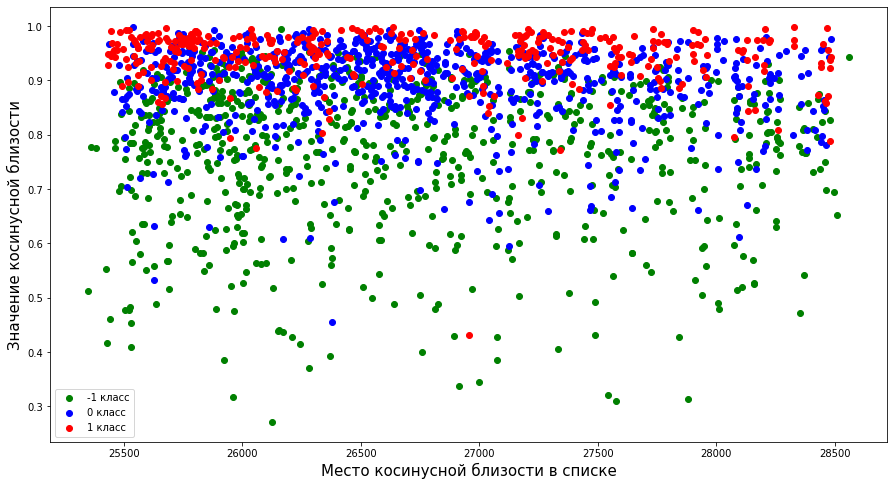

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

x1 = df_1['value/0/#text'].tolist()
y1 = result_1

x2 = df_2['value/0/#text'].tolist()
y2 = result_2

x3 = df_3['value/0/#text'].tolist()
y3 = result_3

ax.scatter(x3, y3, color = 'green', label = '-1 класс')
ax.scatter(x2, y2, color = 'blue', label = '0 класс')
ax.scatter(x1, y1, color = 'red', label = '1 класс')

ax.legend()

plt.xlabel("Место косинусной близости в списке", fontsize = 15)
plt.ylabel("Значение косинусной близости", fontsize = 15)

plt.show()